In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/toy-dataset/toy_dataset.csv")
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [6]:
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)

duplicate_rows = df.duplicated().sum()
print("\nКоличество дубликатов строк:", duplicate_rows)

Пропущенные значения в каждом столбце:
Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Количество дубликатов строк: 0


In [5]:
df.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


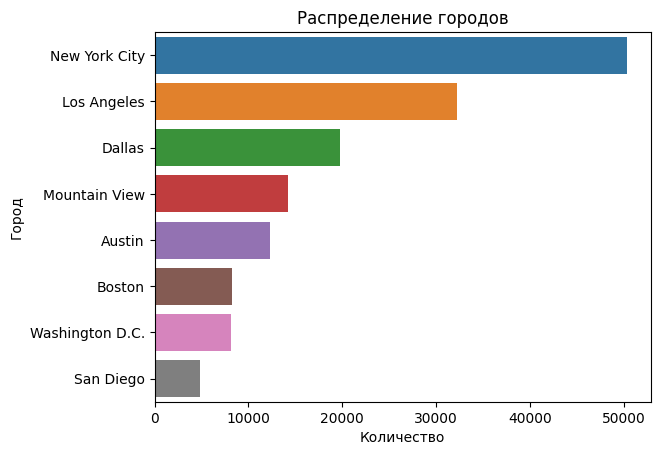

In [14]:
sns.barplot(x = df['City'].value_counts().values, y = df['City'].value_counts().index)
plt.title('Распределение городов')
plt.xlabel('Количество')
plt.ylabel('Город')
plt.savefig('city_dist.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


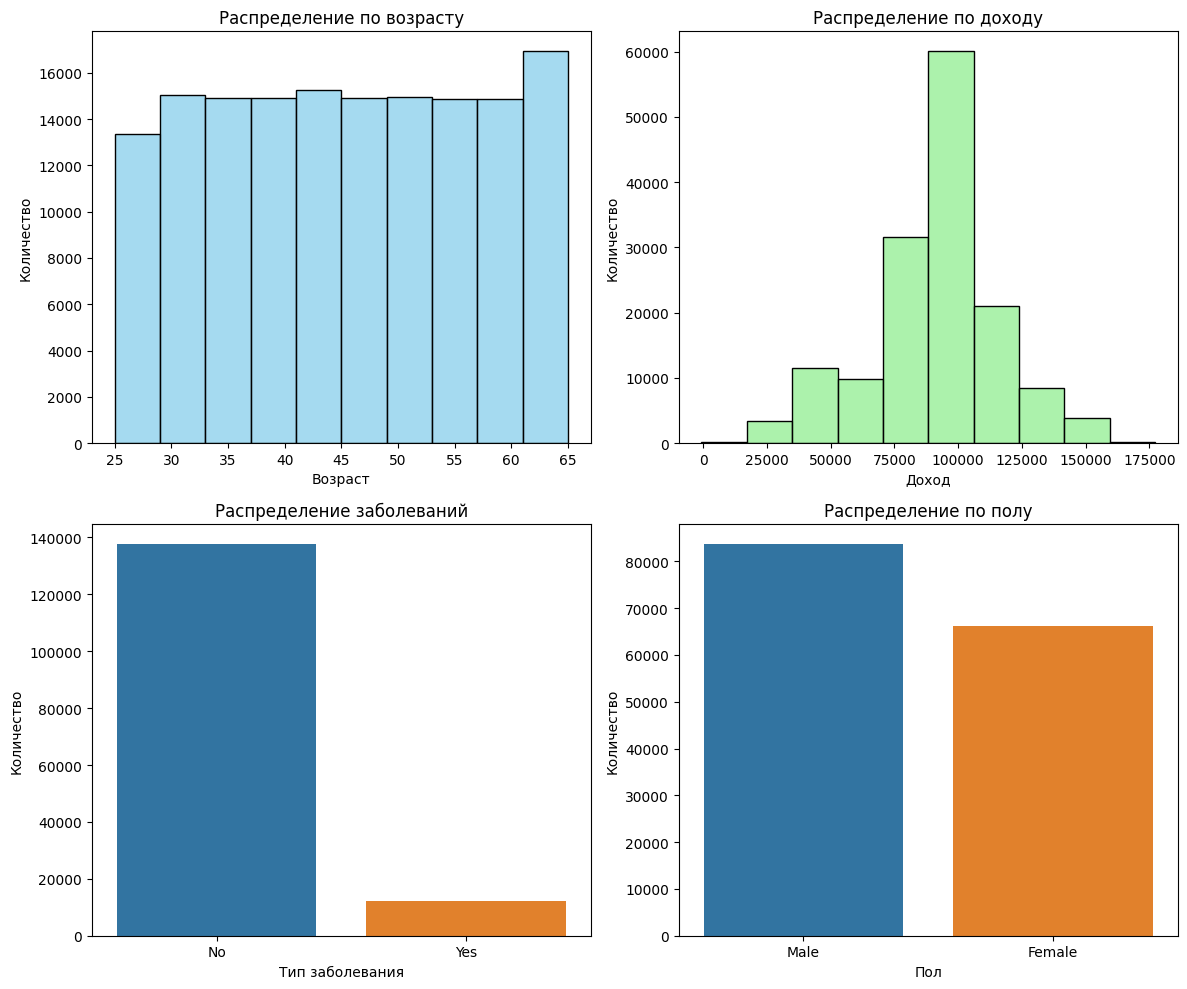

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], bins=10, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Распределение по возрасту')
axs[0, 0].set_xlabel('Возраст')
axs[0, 0].set_ylabel('Количество')

sns.histplot(df['Income'], bins=10, color='lightgreen', ax=axs[0, 1])
axs[0, 1].set_title('Распределение по доходу')
axs[0, 1].set_xlabel('Доход')
axs[0, 1].set_ylabel('Количество')

sns.barplot(x=df['Illness'].value_counts().index, y=df['Illness'].value_counts().values, ax=axs[1, 0])
axs[1, 0].set_title('Распределение заболеваний')
axs[1, 0].set_xlabel('Тип заболевания')
axs[1, 0].set_ylabel('Количество')

sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts().values, ax=axs[1, 1])
axs[1, 1].set_title('Распределение по полу')
axs[1, 1].set_xlabel('Пол')
axs[1, 1].set_ylabel('Количество')

plt.tight_layout()
plt.savefig('dist.png')

plt.show()

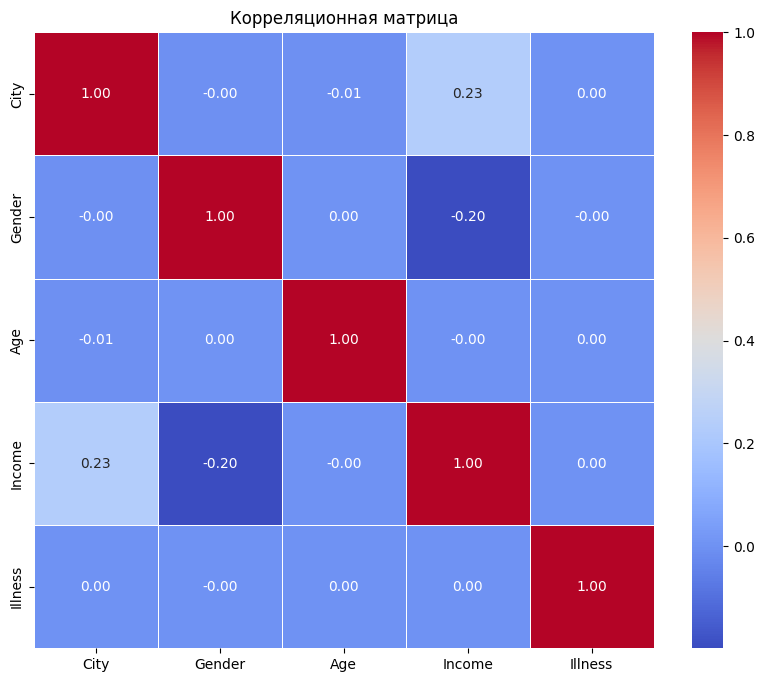

In [42]:
df_encoded = df.copy()
df_encoded = df_encoded.drop('Number', axis = 1)

df_encoded['Gender'] = pd.factorize(df['Gender'])[0]
df_encoded['Illness'] = pd.factorize(df['Illness'])[0]
df_encoded['City'] = pd.factorize(df['City'])[0]
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица')
plt.show()

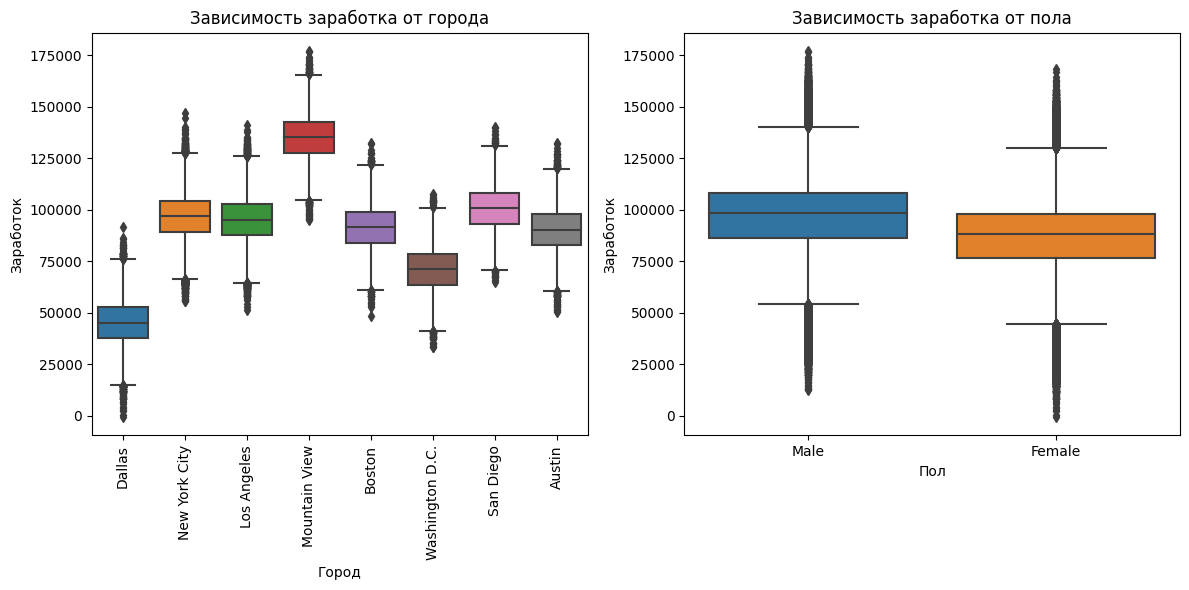

In [45]:
plt.figure(figsize=(12, 6))

# Боксплот для зависимости заработка от города
plt.subplot(1, 2, 1)
sns.boxplot(x='City', y='Income', data=df)
plt.title('Зависимость заработка от города')
plt.xlabel('Город')
plt.ylabel('Заработок')
plt.xticks(rotation=90)

# Боксплот для зависимости заработка от пола
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Зависимость заработка от пола')
plt.xlabel('Пол')
plt.ylabel('Заработок')

plt.tight_layout()
plt.show()